In [1]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn import metrics

import logging,sys


In [2]:
df = pd.read_csv("binary.csv")



In [3]:
df["rank"].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: rank, dtype: float64

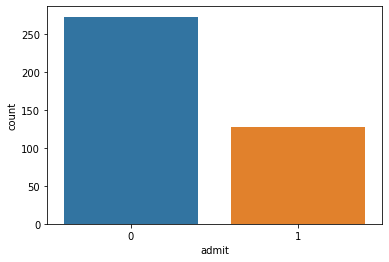

In [4]:
import seaborn as sns
sns.countplot(x="admit",data=df)

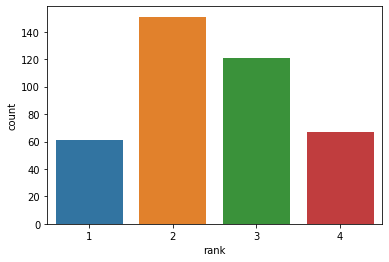

In [5]:
sns.countplot(x="rank",data=df)

In [6]:
df["rank"].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

In [7]:
df["rank"].unique()

array([3, 1, 4, 2])

In [8]:

#Splitting independent data and targeted data as test and train
X_train, X_test, Y_train, Y_test= train_test_split(df[["gpa","gre","rank"]],
                                                   df[["admit"]],test_size=0.2,
                                                   random_state=66)


In [10]:

from sklearn.ensemble import RandomForestClassifier
clf_entropy= RandomForestClassifier(n_estimators=200,criterion='entropy',min_samples_leaf=11, max_depth=4)

clf_entropy.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:

#predicting test data values for clf_entropy model
predicted_entropy = clf_entropy.predict(X_test)

In [12]:
#Confusion Matrix
from  sklearn.metrics import confusion_matrix 
cM = confusion_matrix(Y_test,predicted_entropy)
print(cM)
#generic matrix
tp, fp, fn, tn = cM.ravel()
recall = tp/(tp+fn)
precision=tp/(tp+fp)
print("Recall = Sensitivity = ",tp/(tp+fn))
print("Specificity =", tn/(tn+fp))
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))
print("Precision=",tp/(tp+fp))
f1score= 2 *(recall*precision)/(precision+recall)
print("f1 score=", f1score)


[[57  3]
 [12  8]]
Recall = Sensitivity =  0.8260869565217391
Specificity = 0.7272727272727273
Accuracy= 0.8125
Precision= 0.95
f1 score= 0.8837209302325583


[Text(209.25000000000003, 195.696, 'X[2] <= 2.5\nentropy = 0.91\nsamples = 200\nvalue = [216, 104]'),
 Text(139.5, 152.208, 'X[0] <= 3.93\nentropy = 0.992\nsamples = 110\nvalue = [98, 79]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 3.345\nentropy = 0.966\nsamples = 99\nvalue = [98, 63]'),
 Text(55.800000000000004, 65.232, 'X[2] <= 1.5\nentropy = 0.82\nsamples = 52\nvalue = [64, 22]'),
 Text(27.900000000000002, 21.744, 'entropy = 0.918\nsamples = 17\nvalue = [22, 11]'),
 Text(83.7, 21.744, 'entropy = 0.737\nsamples = 35\nvalue = [42, 11]'),
 Text(167.4, 65.232, 'X[1] <= 630.0\nentropy = 0.994\nsamples = 47\nvalue = [34, 41]'),
 Text(139.5, 21.744, 'entropy = 0.89\nsamples = 27\nvalue = [12, 27]'),
 Text(195.3, 21.744, 'entropy = 0.964\nsamples = 20\nvalue = [22, 14]'),
 Text(167.4, 108.72, 'entropy = 0.0\nsamples = 11\nvalue = [0, 16]'),
 Text(279.0, 152.208, 'X[0] <= 3.49\nentropy = 0.669\nsamples = 90\nvalue = [118, 25]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 510.0\nentropy = 

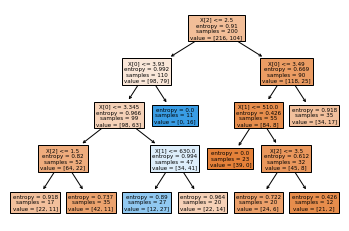

In [15]:
from sklearn.tree import plot_tree
plot_tree(clf_entropy.estimators_[100],filled=True) #for random forest only